# PROJECT  : Flight Delay Prediction

## Compiled by: Mashele G.P

## Project overview/Description
Flight delays not only irritate air passengers and disrupt their schedules but also cause :

* a decrease in efficiency <br>
* an increase in capital costs, reallocation of flight crews and aircraft <br>
* an additional crew expenses <br>
As a result, on an aggregate basis, an airline's record of flight delays may have a negative impact on passenger demand.

This competition aims to predict the estimated duration of flight delays per flight

This solution proposes to build a flight delay predictive model using Machine Learning techniques. The accurate prediction of flight delays will help all players in the air travel ecosystem to set up effective action plans to reduce the impact of the delays and avoid loss of time, capital and resources.

## Problem statement


## Data Description
* DATOP - Date of flight
* FLTID - Flight number
* DEPSTN - Departure point
* ARRSTN - Arrival point
* STD - Scheduled Time departure
* STA - Scheduled Time arrival
* STATUS - Flight status
* ETD - Expected Time departure
* ETA - Expected Time arrival
* ATD - Actual Time of Departure
* ATA - Actual Time of arrival
* DELAY1 - Delay code 1
* DUR1 - delay time 1
* DELAY2 - Delay code 2
* DUR2 - delay time 2
* DELAY3 - Delay code 3
* DUR3 - delay time 3
* DELAY4 - Delay code 4
* DUR4 - delay time 4
* AC - Aircraft Code

In [ ]:
!pip3 install catboost

### Import the necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (mean_squared_error,mean_absolute_error,r2_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To be used for data scaling 
from sklearn.preprocessing import StandardScaler
# To be used for categorical feature selection
from sklearn.feature_selection import chi2
# To oversample and undersample data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
from catboost import CatBoostRegressor
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [286]:
# Now lets read the  flight train and test  dataset
train_data = pd.read_csv("Flight_Train_data.csv")
test_data = pd.read_csv("Flight_Test_data.csv")

In [287]:
# Print the first five rows of the  flight train dataset
train_data.head()  

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.000
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.000
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.000
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.000
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.000


In [288]:
# Print the last five rows of the  flight training dataset
train_data.tail()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.000
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.000
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.000
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.000
107832,train_id_107832,2018-11-13,UG 0002,TUN,DJE,2018-11-13 06:15:00,2018-11-13 07.05.00,SCH,TU CR9ISA,0.000


In [289]:
## Code to print the dimension of the  flight training dataset
train_data.shape

(107833, 10)

In [290]:
print(f" The training dataset consist of {train_data.shape[0]} rows and {train_data.shape[1]} columns")

 The training dataset consist of 107833 rows and 10 columns


In [291]:
## Code to print the data types of the flight training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


### Observation

* The flight training dataset consists of 107833 rows and 10 columns. <br>
* Nine(9) of the columns are object data types and One(1) Float data type. <br>
* The dataset has 8.2 MB(Megabytes) as the memory Usage. 


In [292]:
## Make a copy from the original  flight training dataset
data = train_data.copy()

In [293]:
data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.000
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.000
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.000
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.000
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.000


In [294]:
### Now replace the STA column dot "." with a  ":" 
#data["STA"] = data["STA"].astype(str).str.replace(".",":")

In [295]:
data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.000
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.000
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.000
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.000
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.000


In [296]:
#data =data.drop('NFPD',axis=1)

In [297]:
### Select the columns to changed to datetime format
#date_col=['STD', 'STA']

In [298]:
### Convert  date  object format to datetime format
#for item in date_col:
     # data[item] = pd.to_datetime(data[item])
        

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [300]:
### Drop the ID column in the training dataset
data = data.drop(columns='ID',axis=1)

In [301]:
data.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.000
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.000
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.000
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.000
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.000


In [302]:
### Code to convert the STA datetime into minutes
#data['STA'] =(data["STA"].dt.hour *60) + (data["STA"].dt.minute)+ ((data["STA"].dt.second)/60)

In [303]:
#data['STD'] =(data["STD"].dt.hour *60) + (data["STD"].dt.minute)+ ((data["STD"].dt.second)/60)

In [304]:
data.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.000
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.000
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.000
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.000
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.000


In [305]:
### Now compute the flight scheduled duration in minutes
#data['Scheduled_duration']= data['STA'] -data["STD"]

In [306]:
data.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.000
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.000
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.000
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.000
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.000


In [307]:
# Now drop the STA and STD Column
data = data.drop(columns=['STA','STD'],axis=1)

In [308]:
data.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target
0,2016-01-03,TU 0712,CMN,TUN,ATA,TU 32AIMN,260.000
1,2016-01-13,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.000
2,2016-01-16,TU 0214,TUN,IST,ATA,TU 32AIMN,0.000
3,2016-01-17,TU 0480,DJE,NTE,ATA,TU 736IOK,0.000
4,2016-01-17,TU 0338,TUN,ALG,ATA,TU 320IMU,22.000


In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DATOP   107833 non-null  object 
 1   FLTID   107833 non-null  object 
 2   DEPSTN  107833 non-null  object 
 3   ARRSTN  107833 non-null  object 
 4   STATUS  107833 non-null  object 
 5   AC      107833 non-null  object 
 6   target  107833 non-null  float64
dtypes: float64(1), object(6)
memory usage: 5.8+ MB


In [310]:
## Code to print the first five rows of the testing dataset
test_data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [311]:
### Code to print the dimension of the testing dataset
test_data.shape

(9333, 9)

### Observation
* The testing dataset consist of 9333 rows and 9 columns.

In [312]:
# Code to display the dataset data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      9333 non-null   object
 1   DATOP   9333 non-null   object
 2   FLTID   9333 non-null   object
 3   DEPSTN  9333 non-null   object
 4   ARRSTN  9333 non-null   object
 5   STD     9333 non-null   object
 6   STA     9333 non-null   object
 7   STATUS  9333 non-null   object
 8   AC      9333 non-null   object
dtypes: object(9)
memory usage: 656.4+ KB


### Observation:
* The  training dataset consist of 9333 rows and 9 columns. <br>
* All   columnsare object data types. <br>

In [313]:
### Now replace the STA column dot "." with a  ":" 
#test_data["STA"] = test_data["STA"].astype(str).str.replace(".",":")

In [314]:
### Convert  date  object format to datetime format
#for item in date_col:
      #test_data[item] = pd.to_datetime(test_data[item])

In [315]:
test_data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [316]:
### Code to convert the STA datetime into minutes
#test_data['STA'] =(test_data["STA"].dt.hour *60) + (test_data["STA"].dt.minute)+ ((test_data["STA"].dt.second)/60)
#test_data['STD'] =(test_data["STD"].dt.hour *60) + (test_data["STD"].dt.minute)+ ((test_data["STD"].dt.second)/60)

In [317]:
test_data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [318]:
### Now compute the flight scheduled duration in minutes
#test_data['Scheduled_duration']= test_data['STA'] -test_data["STD"]

In [319]:
test_data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [320]:
# Now drop the STA and STD Column
test_data = test_data.drop(columns=['STA','STD'],axis=1)

In [321]:
test_data.shape

(9333, 7)

In [322]:
data.shape

(107833, 7)

In [323]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      9333 non-null   object
 1   DATOP   9333 non-null   object
 2   FLTID   9333 non-null   object
 3   DEPSTN  9333 non-null   object
 4   ARRSTN  9333 non-null   object
 5   STATUS  9333 non-null   object
 6   AC      9333 non-null   object
dtypes: object(7)
memory usage: 510.5+ KB


In [324]:
### Make a copy of the training dataset
flight_data = test_data.copy()

In [325]:
## drop the ID column
flight_data = flight_data.drop("ID",axis=1)

In [326]:
flight_data.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC
0,2016-05-04,TU 0700,DJE,TUN,ATA,TU 32AIMF
1,2016-05-05,TU 0395,TUN,BKO,ATA,TU 320IMW
2,2016-05-06,TU 0745,FRA,TUN,ATA,TU 32AIMC
3,2016-05-11,TU 0848,BEY,TUN,ATA,TU 31BIMO
4,2016-05-11,TU 0635,ORY,MIR,ATA,TU 736IOQ


In [327]:
 # Code to print the statistical summary of the numerical columns in the training dataset
flight_data.describe().T

,count,unique,top,freq
DATOP,9333,86,2018-09-03,181
FLTID,9333,700,WKL 0000,267
DEPSTN,9333,82,TUN,3621
ARRSTN,9333,84,TUN,3650
STATUS,9333,5,ATA,8027
AC,9333,44,TU 320IMS,423


In [328]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,107833.000,48.733,117.136,0.000,0.000,14.000,43.000,3451.000


In [329]:
# Code to check for missing values in the testing dataset
flight_data.isnull().sum().sum()

0

In [330]:
data.isnull().sum().sum()

0

In [331]:
### Now compute the  percentage of missing values in each column
round((flight_data.isnull().sum()/ flight_data.shape[0])*100,)

DATOP    0.000
FLTID    0.000
DEPSTN   0.000
ARRSTN   0.000
STATUS   0.000
AC       0.000
dtype: float64

In [332]:
# Code to check for duplicates in the  training dataset
data.duplicated().sum()

16

In [333]:
# Code to check for duplicates in the  testing dataset
flight_data.duplicated().sum()

4

In [334]:
flight_data.shape

(9333, 6)

# Exploratory data analysis(EDA)

## Univariate data analysis

### Numerical data

In [335]:
# Code to select the numerical columns from the training dataset
numerical_columns =data.select_dtypes("number").columns

In [336]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))                    # increase the size of the plot
    plt.title(f"Histogram for {item}")           # Give the graph a title
    plt.xlabel(item)                            # set the label on the x-axis
    plt.ylabel("frequency")                     # set the label on the y-axis
    sns.histplot(data=data,x=item,kde=False);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))                     # increase the size of the plot
    plt.title(f"Boxplot for {item}")               # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);   # Boxplot for numerical dataset
    plt.xlabel(item)                               # set the label on the x-axis
    plt.show()

In [337]:
numerical_columns

Index(['target'], dtype='object')

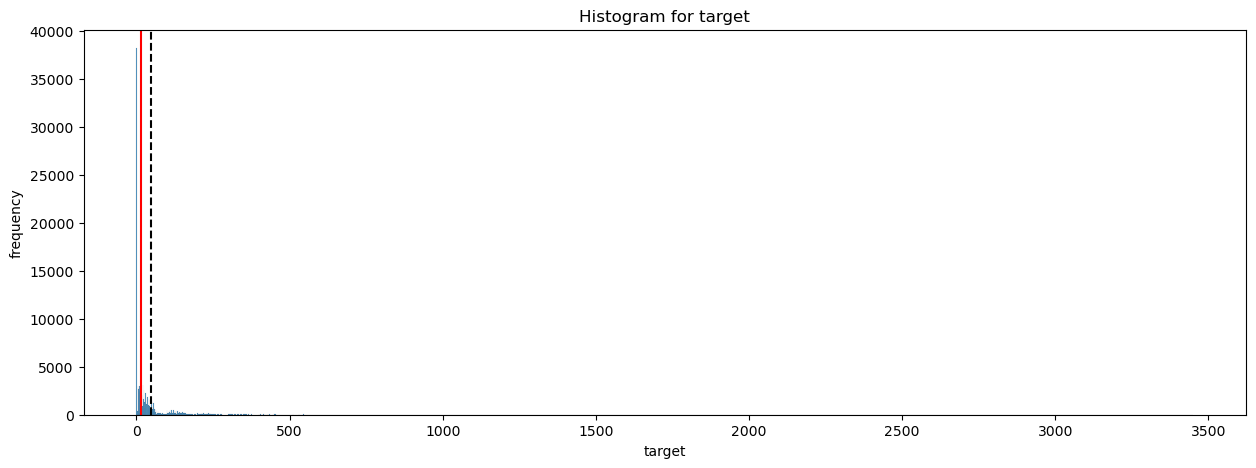

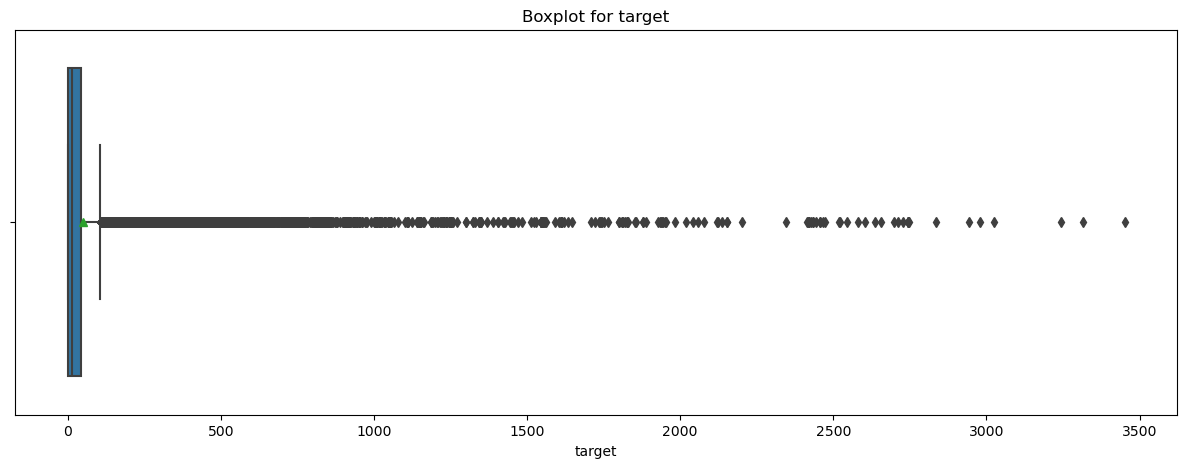

In [338]:
# Code to call the function to display the histogram and boxplots for numerical columns
for item in data[numerical_columns]:
    box_histplot(data,item)

## Categorical data analysis:

In [ ]:
# Code to select categorical columns
categorical_data = data.select_dtypes("object").columns  

In [ ]:
categorical_data

In [ ]:
## Create a function to display the bar graphs for categorical data columns
def count_plot(data,item):
    plt.figure(figsize=(5,4))            # increase the size of the plot
    sns.countplot(data=data , x=item);   # countplot for categorical columns
    plt.title(f"Countplot for {item}")   # add the title on the countplot
    plt.ylabel("frequency")              # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

In [ ]:
 for variable in categorical_data:
        count_plot(data,variable)

## Bivariate data analysis:

#### Categorical and Numerical data analysis

In [ ]:
## Create a function to display boxplots for numerical and categorical dataset
def box_plot(data,item_1,categorical_item):
    plt.figure(figsize=(15,7))                       # Increase the size of the plot
    sns.boxplot(data=data,x = item_1, y = categorical_item, palette = "Paired_r") 
    plt.title(f"The boxplot for {item_1} relative to {categorical_item}")
    plt.xlabel(item_1)
    plt.ylabel(categorical_item)
    plt.show()

### Categorical data analysis only

In [ ]:
## Create a function to display a countplot for bivariate categorical columns relatives to churn data
def bivariate_plot(data,item_1,item_2,color):
    plt.figure(figsize=(10,7))
    sns.countplot(x=item_1,data=data,palette=color,hue=item_2)
    plt.ylabel("frequency")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
categorical_data

### Numerical data

In [ ]:
#df =green_data[numerical_columns].corr()

In [ ]:
## Construct a correlation matrix
#plt.figure(figsize=(20, 10))
#sns.heatmap(df,annot=True,vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
#plt.show()

In [339]:
### Select columns that are highly correlated
def correlation(data,cut_off):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> cut_off:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [340]:
numerical_columns= data.select_dtypes("number").columns

In [341]:
### Now lets display the highly correlated columns
feature = correlation(data[numerical_columns],0.7)
print(feature)

set()


#### OUTLIER DETECTION AND TREATMENT

In [407]:
numerical_columns1= data.select_dtypes("number").columns

In [408]:
numerical_columns1

Index(['target'], dtype='object')

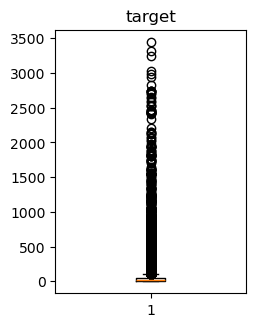

In [409]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numerical_columns1):
    plt.subplot(4,7, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

# LEAVE OUT OUTLIERS

### Treatment of Outliers
* 85%  of the numerical columns have outliers on the upper fence of the whiskers
* We need to trim the data above the upper fence of the box and whisker diagram.

In [410]:
### Create a function to identify outliers
def outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [411]:
for column in data.columns:
    if data[column].dtypes != 'object':
        UL,LL = outliers(data[column])
        data[column] = np.where((data[column]<LL)|(data[column]>UL),np.nan,data[column])

In [412]:
for column in flight_data.columns:
    if flight_data[column].dtypes != 'object':
        UL,LL = outliers(flight_data[column])
        flight_data[column] = np.where((flight_data[column]<LL)|(flight_data[column]>UL),np.nan,flight_data[column])

In [413]:
data.isnull().sum()

DATOP         0
FLTID         0
DEPSTN        0
ARRSTN        0
STATUS        0
AC            0
target    14608
dtype: int64

In [414]:
data.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target
0,2016-01-03,TU 0712,CMN,TUN,ATA,TU 32AIMN,NaN
1,2016-01-13,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.000
2,2016-01-16,TU 0214,TUN,IST,ATA,TU 32AIMN,0.000
3,2016-01-17,TU 0480,DJE,NTE,ATA,TU 736IOK,0.000
4,2016-01-17,TU 0338,TUN,ALG,ATA,TU 320IMU,22.000


In [415]:
data['target'].max()

107.0

### Split the data into train and validation sets

In [416]:
data.columns

Index(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STATUS', 'AC', 'target'], dtype='object')

In [417]:
# Dividing train data into X and y 
X = data.drop(['target'], axis=1)
y = data['target']

In [418]:
# Splitting the dataset into training and validation set into a ratio of 70:30 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30,random_state=42)

In [419]:
print(f"The training dataset consits of {X_train.shape[0]} rows and {X_train.shape[1]} columns")

The training dataset consits of 75483 rows and 6 columns


In [420]:
print(f"The validation dataset consists of {X_val.shape[0]} rows and {X_val.shape[1]} columns")

The validation dataset consists of 32350 rows and 6 columns


In [421]:
X_train.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC
76952,2018-08-01,TU 8956,MIR,LJU,ATA,TU 32AIMN
39411,2017-05-24,TU 0246,TUN,SXB,ATA,TU 736IOQ
18120,2016-02-19,TU 0250,MIR,NCE,ATA,TU 736IOK
100964,2018-10-26,TU 0538,DJE,DUS,ATA,TU 32AIMI
44997,2017-04-12,TU 0607,MAD,TUN,ATA,TU 32AIMD


In [422]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75483 entries, 76952 to 15795
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATOP   75483 non-null  object
 1   FLTID   75483 non-null  object
 2   DEPSTN  75483 non-null  object
 3   ARRSTN  75483 non-null  object
 4   STATUS  75483 non-null  object
 5   AC      75483 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


## Data preprocessing

### Feature engineering

### Dealing with missing Values

In [423]:
X_train.isnull().sum()/X_train.shape[0] *100

DATOP    0.000
FLTID    0.000
DEPSTN   0.000
ARRSTN   0.000
STATUS   0.000
AC       0.000
dtype: float64

In [424]:
X_val.isnull().sum()/X_val.shape[0] *100

DATOP    0.000
FLTID    0.000
DEPSTN   0.000
ARRSTN   0.000
STATUS   0.000
AC       0.000
dtype: float64

In [425]:
# To impute missing values
from sklearn.impute import SimpleImputer

In [228]:
train_cols = X_train.select_dtypes("number").columns

In [229]:
train_cols

Index(['Scheduled_duration'], dtype='object')

In [230]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_train[train_cols] = median_imputer.fit_transform(X_train[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.682


In [231]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_val[train_cols] = median_imputer.fit_transform(X_val[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.1024


In [426]:
y_train.head()

76952    16.000
39411    21.000
18120     0.000
100964    0.000
44997       NaN
Name: target, dtype: float64

In [427]:
y_train = pd.DataFrame(y_train)

In [428]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
y_train = median_imputer.fit_transform(y_train)
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.2757


In [429]:
y_val = pd.DataFrame(y_val)

In [430]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
y_val = median_imputer.fit_transform(y_val)
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0325


In [240]:
## We need to drop columns with missing values greater than 50% in training dataset

In [241]:
## Code to print the columns with missing values greater than 50%
col_feature=[] # create an empty list
for item in  data.columns:
    if ((data[item].isnull().sum()/data.shape[0])>0.50):
        col_feature.append(item)  # append the columns with missing values greater than 50% in the list
print(col_feature) 

[]


In [431]:
X_train.isnull().sum().sum()

0

In [432]:
X_val.isnull().sum().sum()

0

In [433]:
flight_data.isnull().sum().sum()

0

In [434]:
X_train.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC
76952,2018-08-01,TU 8956,MIR,LJU,ATA,TU 32AIMN
39411,2017-05-24,TU 0246,TUN,SXB,ATA,TU 736IOQ
18120,2016-02-19,TU 0250,MIR,NCE,ATA,TU 736IOK
100964,2018-10-26,TU 0538,DJE,DUS,ATA,TU 32AIMI
44997,2017-04-12,TU 0607,MAD,TUN,ATA,TU 32AIMD


In [435]:
X_train= X_train.sort_index()

In [436]:
X_train.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC
0,2016-01-03,TU 0712,CMN,TUN,ATA,TU 32AIMN
1,2016-01-13,TU 0757,MXP,TUN,ATA,TU 31BIMO
2,2016-01-16,TU 0214,TUN,IST,ATA,TU 32AIMN
4,2016-01-17,TU 0338,TUN,ALG,ATA,TU 320IMU
5,2016-01-17,TU 0283,TLS,TUN,ATA,TU 736IOP


In [437]:
X_val =X_val.sort_index()

In [438]:
X_val.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC
3,2016-01-17,TU 0480,DJE,NTE,ATA,TU 736IOK
8,2016-01-18,TU 0752,TUN,FCO,ATA,TU 32AIMC
17,2016-01-23,TU 0726,MIR,BRU,ATA,TU 31AIMJ
23,2016-02-01,TU 0913,TUN,MED,ATA,TU 320IMT
24,2016-02-02,TU 0711,TUN,CMN,ATA,TU 320IMU


In [439]:
X_train.shape , X_val.shape

((75483, 6), (32350, 6))

In [440]:
test_data.shape

(9333, 8)

In [441]:
flight_data.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC
0,2016-05-04,TU 0700,DJE,TUN,ATA,TU 32AIMF
1,2016-05-05,TU 0395,TUN,BKO,ATA,TU 320IMW
2,2016-05-06,TU 0745,FRA,TUN,ATA,TU 32AIMC
3,2016-05-11,TU 0848,BEY,TUN,ATA,TU 31BIMO
4,2016-05-11,TU 0635,ORY,MIR,ATA,TU 736IOQ


In [442]:
flight_data.shape

(9333, 6)

In [443]:
X_test = flight_data.copy()

In [444]:
X_test.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC
0,2016-05-04,TU 0700,DJE,TUN,ATA,TU 32AIMF
1,2016-05-05,TU 0395,TUN,BKO,ATA,TU 320IMW
2,2016-05-06,TU 0745,FRA,TUN,ATA,TU 32AIMC
3,2016-05-11,TU 0848,BEY,TUN,ATA,TU 31BIMO
4,2016-05-11,TU 0635,ORY,MIR,ATA,TU 736IOQ


In [1]:
## Instantiate the simple imputer 
#median_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
## Fit and transform the numerical columns in the training dataset
#import time
#startScript = time.time()
#X_test[train_cols] = median_imputer.fit_transform(X_test[train_cols])
#endScript = time.time()
#display = endScript-startScript   # code to calculate the running time 
#print(f"The running time:{round(display,4)}")

In [446]:
X_train.shape

(75483, 6)

In [447]:
X_val.shape

(32350, 6)

In [448]:
X_test.shape

(9333, 6)

In [449]:
X_test.isnull().sum().sum()

0

### Model Building: CATBOOST 

## Performance measures description: RMSE


In [450]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_regression_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        rmse= mean_squared_error(target,pred,squared=False)  # to compute the room mean square error using the target and predicted values
        mse= mean_squared_error(target,pred,squared=True)   # compute the mean squared error  
        mae = mean_absolute_error(target, pred)  # to compute mean absolute error using target and predicted values
       
        
        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Root Mean Squared error":rmse,"Mean Squared error":mse,
                                 "Mean Absolute error": mae },index=[0],)

        return df_perf

In [451]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

In [452]:
### Code to select all the features on the training dataset
features = list(X_train.columns)

In [453]:
features

['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STATUS', 'AC']

In [454]:
### Code to select categorical features
cat_features = np.where(X_train.dtypes !=float)[0]

In [455]:
cat_features

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [456]:
### Instantiate the Catboost model
model = CatBoostRegressor( 
                          iterations=5000,
                          eval_metric="RMSE",
                          learning_rate=0.001,
                          depth=4,
                          loss_function ="RMSE",
                          random_seed = 35,    
                          od_type ='Iter',    # Overfit detector
                          od_wait = 20,  # most recent best iteration to wait before stopping
                          verbose=True,
                          use_best_model=True,
                          metric_period =20
                         )
### Now fit the model in the training dataset
cat_model = model.fit(X_train,y_train,cat_features= cat_features,use_best_model=True,plot=True,
                     eval_set= (X_val,y_val))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 20.9136043	test: 21.0074041	best: 21.0074041 (0)	total: 1.2s	remaining: 1h 40m 19s
20:	learn: 20.9135628	test: 21.0074040	best: 21.0074037 (3)	total: 5.02s	remaining: 19m 51s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 21.00740367
bestIteration = 3

Shrink model to first 4 iterations.


In [457]:
## Check the performamce for each model in the training data of the imbalanced data 
cat_train_perf = model_performance_regression_sklearn(cat_model,X_train,y_train)
## Check the performamce for each model in the imbalanced validation data
cat_val_perf= model_performance_regression_sklearn(cat_model,X_val,y_val)

In [458]:
cat_perf = pd.concat([cat_train_perf.T,cat_val_perf.T],axis=1)
cat_perf.columns =["Training","Validation"]

In [459]:
print("CATBoost Peformance measures on the original data")
cat_perf

CATBoost Peformance measures on the original data


,Training,Validation
Root Mean Squared error,20.914,21.007
Mean Squared error,437.379,441.311
Mean Absolute error,15.626,15.525


### Hyperparametric tuning for Catboost Classifier

In [460]:
# Parameter grid to pass in GridSearchCV
param_grid = { 'learning_rate': [0.001,0.01,0.5], }

# Defining the catboost regressor model
catboost_tuned = CatBoostRegressor(iterations=20,cat_features= cat_features,eval_metric="RMSE",verbose=20)
# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=catboost_tuned, param_grid=param_grid, cv=3)

#Fitting parameters in RandomizedSearchCV
grid_cv=grid_cv.fit(X_train,y_train)
# Set the clf to the best combination of parameters and fit the tuned model
catboost_tuned=grid_cv.best_estimator_
catboost_tuned.fit(X_train,y_train)

0:	learn: 20.8556415	total: 341ms	remaining: 6.49s
19:	learn: 20.8554236	total: 2.27s	remaining: 0us
0:	learn: 20.8693710	total: 38ms	remaining: 723ms
19:	learn: 20.8692026	total: 1.72s	remaining: 0us
0:	learn: 21.0153137	total: 102ms	remaining: 1.94s
19:	learn: 21.0151767	total: 1.7s	remaining: 0us
0:	learn: 20.8555350	total: 103ms	remaining: 1.95s
19:	learn: 20.8537642	total: 1.8s	remaining: 0us
0:	learn: 20.8693519	total: 40.5ms	remaining: 770ms
19:	learn: 20.8676974	total: 1.72s	remaining: 0us
0:	learn: 21.0151937	total: 116ms	remaining: 2.2s
19:	learn: 21.0140274	total: 2.31s	remaining: 0us
0:	learn: 20.8510121	total: 256ms	remaining: 4.86s
19:	learn: 20.8036319	total: 2.56s	remaining: 0us
0:	learn: 20.8685748	total: 44.5ms	remaining: 846ms
19:	learn: 20.8117651	total: 1.72s	remaining: 0us
0:	learn: 21.0101490	total: 86.6ms	remaining: 1.64s
19:	learn: 20.9556968	total: 1.72s	remaining: 0us
0:	learn: 20.9136050	total: 158ms	remaining: 3.01s
19:	learn: 20.9134661	total: 2.65s	remain

In [461]:
## display the best estimators
grid_cv.best_estimator_

In [462]:
## Check the performamce for each model in the training data of the imbalanced data 
cat_train_perf_tuned = model_performance_regression_sklearn(catboost_tuned,X_train,y_train)
## Check the performamce for each model in the imbalanced validation data
cat_val_perf_tuned= model_performance_regression_sklearn(catboost_tuned,X_val,y_val)

In [463]:
cat_perf_tuned = pd.concat([cat_train_perf_tuned.T,cat_val_perf_tuned.T],axis=1)
cat_perf_tuned.columns =["Training","Validation"]

In [464]:
print("CATBoost Peformance measures on the original data")
cat_perf_tuned

CATBoost Peformance measures on the original data


,Training,Validation
Root Mean Squared error,20.914,21.007
Mean Squared error,437.375,441.311
Mean Absolute error,15.626,15.525


##  Feature importances

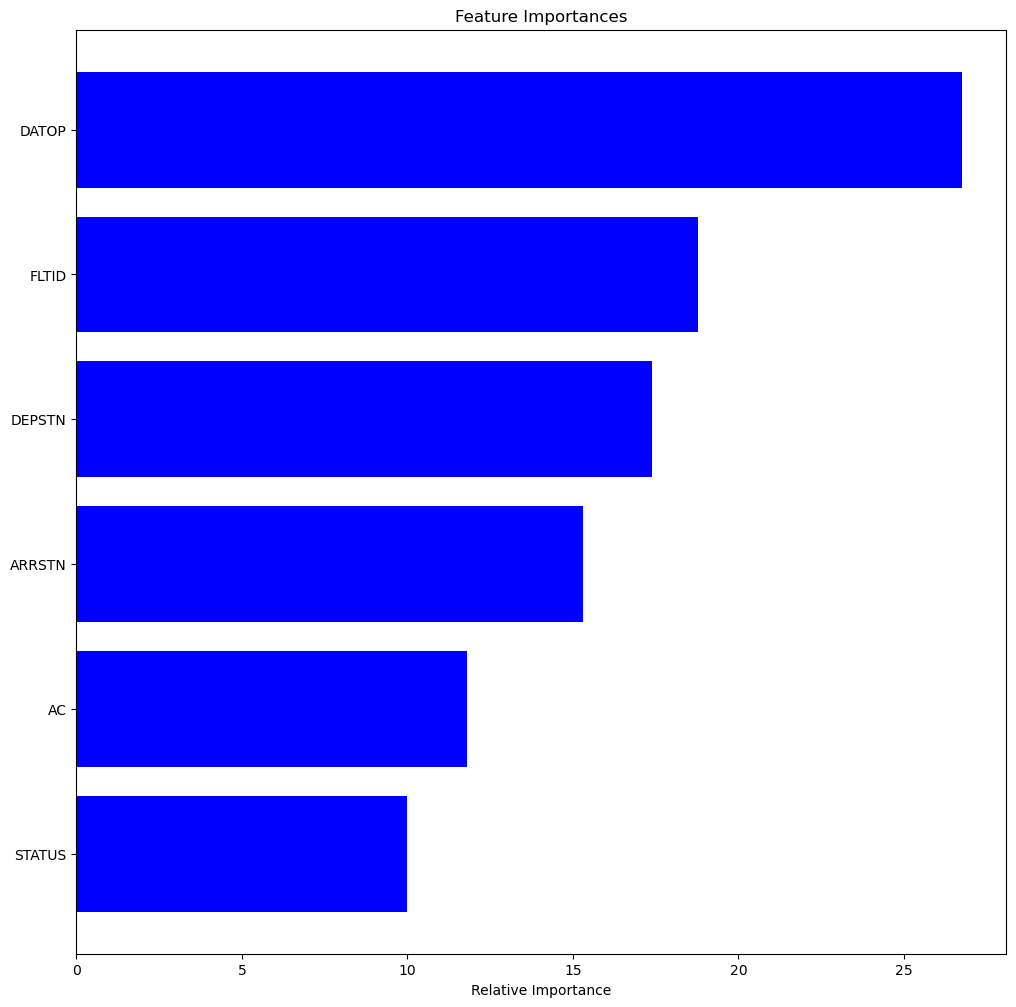

In [465]:
 ## Code to check the feature importance on the best model
feature_names = features
importances =catboost_tuned.feature_importances_   
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [466]:
test_data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,ATA,TU 32AIMF,48.623
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,ATA,TU 320IMW,48.624
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,ATA,TU 32AIMC,48.632
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,ATA,TU 31BIMO,48.623
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,ATA,TU 736IOQ,48.623


In [467]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test_data["target"] = catboost_tuned.predict(X_test)

In [468]:
test_data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,ATA,TU 32AIMF,16.079
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,ATA,TU 320IMW,16.080
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,ATA,TU 32AIMC,16.079
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,ATA,TU 31BIMO,16.079
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,ATA,TU 736IOQ,16.079


In [469]:
data_df =pd.DataFrame({"ID":test_data["ID"],"target":test_data["target"]})

In [470]:
data_df.head()

,ID,target
0,test_id_0,16.079
1,test_id_1,16.080
2,test_id_2,16.079
3,test_id_3,16.079
4,test_id_4,16.079


In [471]:
data_df.tail()

,ID,target
9328,test_id_9328,16.080
9329,test_id_9329,16.077
9330,test_id_9330,16.078
9331,test_id_9331,16.082
9332,test_id_9332,16.079


In [393]:
 # code to save the predicted dataset as a csv file
data_df.to_csv("Submission_file(flight_delay5).csv",index=False)   # code to save the predicted values as a csv file

In [405]:
df = pd.read_csv("Submission_file(flight_delay5).csv")

In [406]:
df.head()

,ID,target
0,test_id_0,48.623
1,test_id_1,48.624
2,test_id_2,48.632
3,test_id_3,48.623
4,test_id_4,48.623
